In [44]:
import numpy as np
import pandas as pd
import os

# new_path = os.path.join('/Users/sukruthananth/Desktop/Machine Learning and Data Analysis', 'adult.data')
# the indexing in pandas is different from the numpy. it includes the last number 
import IPython 


data = pd.read_csv('adult.data', header=None,index_col=False, names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
               'marital-status', 'occupation', 'relationship', 'race', 'gender',
               'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
               'income'])

# data = data['age', 'workclass', 'education', 'gender', 'hours-per-week','occupation', 'income']

# data[0]

data = data[['age','workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]


data_dummies = pd.get_dummies(data)

features = data_dummies.loc[:,'age':'occupation_ Transport-moving']

X = features.values

y = data_dummies['income_ >50K'].values


from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression().fit(X_train, y_train)

logreg.score(X_test, y_test)

/Users/sukruthananth/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8067804937968308

In [134]:
import mglearn

from mglearn.datasets import make_wave

X,y = make_wave()


bins = np.linspace(-3,3,11)

# print("bins{}".format(bins))


which_bin = np.digitize(X, bins=bins) # transformed single continuous feature into a categorical feature

# we cannot apply get dummies on this data as it does not work on integers so we can apply One hot encoder 

# we are doing this because we more features so that the linear model plots more than just a line with one feature 

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False).fit(which_bin)

X_binned = encoder.transform(which_bin)

# print(X_binned[:5])

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1,1)

line


# line_binned = encoder.transform(np.digitize(line, bins=bins))

from matplotlib import pyplot as plt

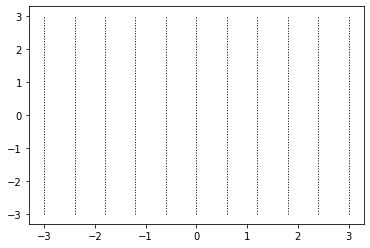

In [75]:
# bifurcating using bins

for bin in bins:
        plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

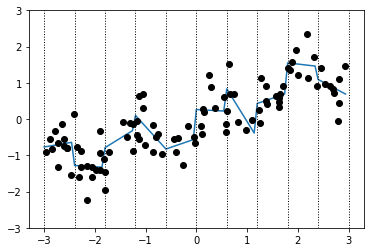

In [135]:
#interactions and polynomials - using this we can add slope to the bin while just binning will only learn offsets
from sklearn.linear_model import LinearRegression

encoder = OneHotEncoder(sparse = False).fit(np.digitize(X, bins=bins))

X_binned = encoder.transform(np.digitize(X, bins=bins))


X * X_binned, X, X_binned

# this gives slope to that particular bin. 

X_product = np.hstack([X_binned, X*X_binned])

Line = np.linspace(-3,3,100, endpoint=False).reshape(-1,1) #if we do not use endpoint = false, then the encoder 
#do not recognize the last number of the line , 3, as it belongs to bin =11 which was not used during fitting 
#as it is not available in X


line_binned = encoder.transform(np.digitize(Line, bins = bins))

Line_product = np.hstack([line_binned, Line*line_binned])

logreg = LinearRegression().fit(X_product, y)

plt.plot(Line, logreg.predict(Line_product))

plt.ylim(-3,3)
for bin in bins:
        plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
        
plt.plot(X[:,0], y, 'o', c='k')


array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

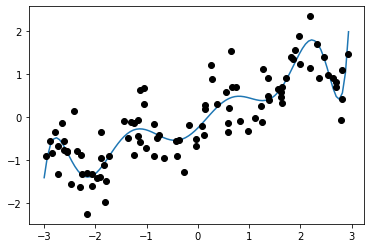

In [136]:
# we can also use polynomials to add more features to the continous feature 

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree =10, include_bias=False) #include_bias =true adds 1 entire column of values = 1

poly.fit(X)

X_poly = poly.transform(X)

Line_poly = poly.transform(Line)

reg = LinearRegression().fit(X_poly, y)

plt.plot(Line, reg.predict(Line_poly))

plt.plot(X[:,0],y, 'o', c='k')


bins


In [145]:
# on Boston housing data 

from sklearn.datasets import load_boston

from sklearn.preprocessing import MinMaxScaler

boston= load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2, include_bias=False).fit(X_train_scaled)

X_train_poly = poly.transform(X_train_scaled)

X_test_poly = poly.transform(X_test_scaled)


from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train) 
print("Score without interactions: {:.3f}".format(
ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train) 
print("Score with interactions: {:.3f}".format(
ridge.score(X_test_poly, y_test))) 
    
    
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train) 
print("Score without interactions: {:.3f}".format(
rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train) 
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))
    

Score without interactions: 0.621
Score with interactions: 0.753
Score without interactions: 0.796
Score with interactions: 0.770


Test score: 0.622
Test score: 0.875


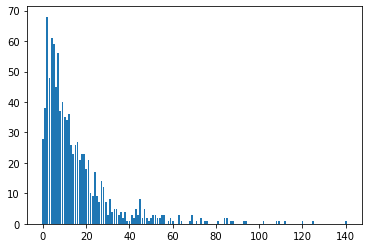

In [175]:
# transformations using mathematical functions

# on a data like this linear does not give good results hence it is important to apply log functions to get the features relative to each other when they are not linear

rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))

w = rnd.normal(size=3)
X = rnd.poisson(10*np.exp(X_org))
y = np.dot(X_org, w)
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)), bins)


from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test) 
print("Test score: {:.3f}".format(score))


In [205]:
#automatic feature selection 

#1. univariate - this uses select percentile method 

from sklearn.datasets import load_breast_cancer

from sklearn.feature_selection import SelectPercentile

from sklearn.feature_selection import SelectFromModel # select from model, takes all the features at once unlikke select percentile which works on one feature at one time

from sklearn.feature_selection import RFE # does adding or elimination of features


cancer = load_breast_cancer()

# X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)


# let us add some noise to the data to check if the selectors remove the noise or not 
rng = np.random.RandomState(42)

noise = rng.normal(size=(len(cancer.data),50))

# add noise to the trained value

X_noise_data = np.hstack([cancer.data, noise])

# X_noise_data.shape
# print(X_noise_data.shape)

X_train, X_test, y_train, y_test = train_test_split(X_noise_data, cancer.target, random_state=0)

select = SelectPercentile(percentile=50)

select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)

X_test_selected = select.transform(X_test)


select.get_support()# this gives us which feature is selected 

# checkking the score with logistic regression before and after selecting 

reg = LogisticRegression()

reg.fit(X_train, y_train)

reg.score(X_test,y_test)

print("without selection", reg.score(X_test,y_test))

reg.fit(X_train_selected, y_train)


print("after selection",reg.score(X_test_selected, y_test))



# model based selection 

from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")

select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)

X_test_selected = select.transform(X_test)


reg.fit(X_train_selected, y_train)

print("model selection results",reg.score(X_test_selected,y_test))


# same goes with Recursive feature elimination RFE, once we select the right features, 
#even logistic regression works as good as the random forest




/Users/sukruthananth/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sukruthananth/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

without selection 0.8811188811188811
after selection 0.9300699300699301
model selection results 0.9300699300699301


/Users/sukruthananth/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [297]:
# Expert knowledge

# using POSIX time is very important

citibike = mglearn.datasets.load_citibike()
xticks = pd.date_range(citibike.index.min(), citibike.index.max(), freq='D')


# plt.plot(citibike)
# plt.xticks(xticks, xticks.strftime('%a %m-%d'), ha="left", rotation=90)


y= citibike.values

x = citibike.index.astype("int64").values.reshape(-1,1) // 10**9

citibike.index, citibike.index.astype('int64')
#pd.date_range()

regressor = RandomForestRegressor(n_estimators=100, random_state=0)

X_train, X_test = x[:184], x[184:]

y_train, y_test = y[:184], y[184:]

regressor.fit(X_train, y_train)

# regressor.score(X_test, y_test) # the regressor does not work because the values provided in the X_test are out of range

X_hour_week = np.hstack([citibike.index.hour.values.reshape(-1,1), citibike.index.weekday.values.reshape(-1,1)])

X_hour_week_train, X_hour_week_test = X_hour_week[:184], X_hour_week[184:]

regressor.fit(X_hour_week_train, y_train)

regressor.score(X_hour_week_test, y_test)


# check the same of linear regression as this data does not require complex model as it is only learning mean value
reg = LinearRegression()

reg.fit(X_hour_week_train, y_train)
reg.score(X_hour_week_test, y_test) # linear model does a very bad job because it interprets the data as continuous 

# we can make it categorical using one hot encoder

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

encoder.fit(X_hour_week)
X_hour_week_enc = encoder.transform(X_hour_week)


X_hour_week_train, X_hour_week_test = X_hour_week_enc[:184], X_hour_week_enc[184:]

regressor.fit(X_hour_week_train, y_train)

regressor.score(X_hour_week_test, y_test)

X_hour_week_enc

# we should also apply polynomials or interactions to make sure that every pair of day and week get their own slopes

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

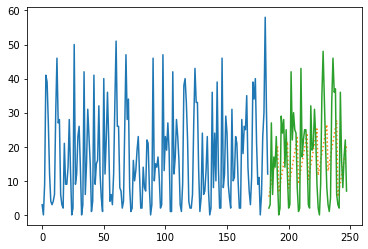

In [285]:
plt.plot(range(184), y_train, label="train")

plt.plot(range(184, len(y_test) +184), reg.predict(X_hour_week_test), ':', label="test")

plt.plot(range(184, len(y_test) +184), y_test, label="test")


In [280]:
b = range(2,1)
b

range(2, 1)